In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
std_por = pd.read_csv("student-por.csv", sep=";")
std_mat = pd.read_csv("student-mat.csv", sep=";")

In [4]:
std_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
std_por.shape

(649, 33)

In [7]:
std_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
std_mat.shape

(395, 33)

In [9]:
std_por["Mat"] = 0

In [10]:
std_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0


In [11]:
std_mat["Mat"] = 1

In [12]:
std_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


#### Append the data data frame in order to consider them as 1

In [14]:
df = std_mat.append(std_por)

In [15]:
df.shape

(1044, 34)

## Data Visualization

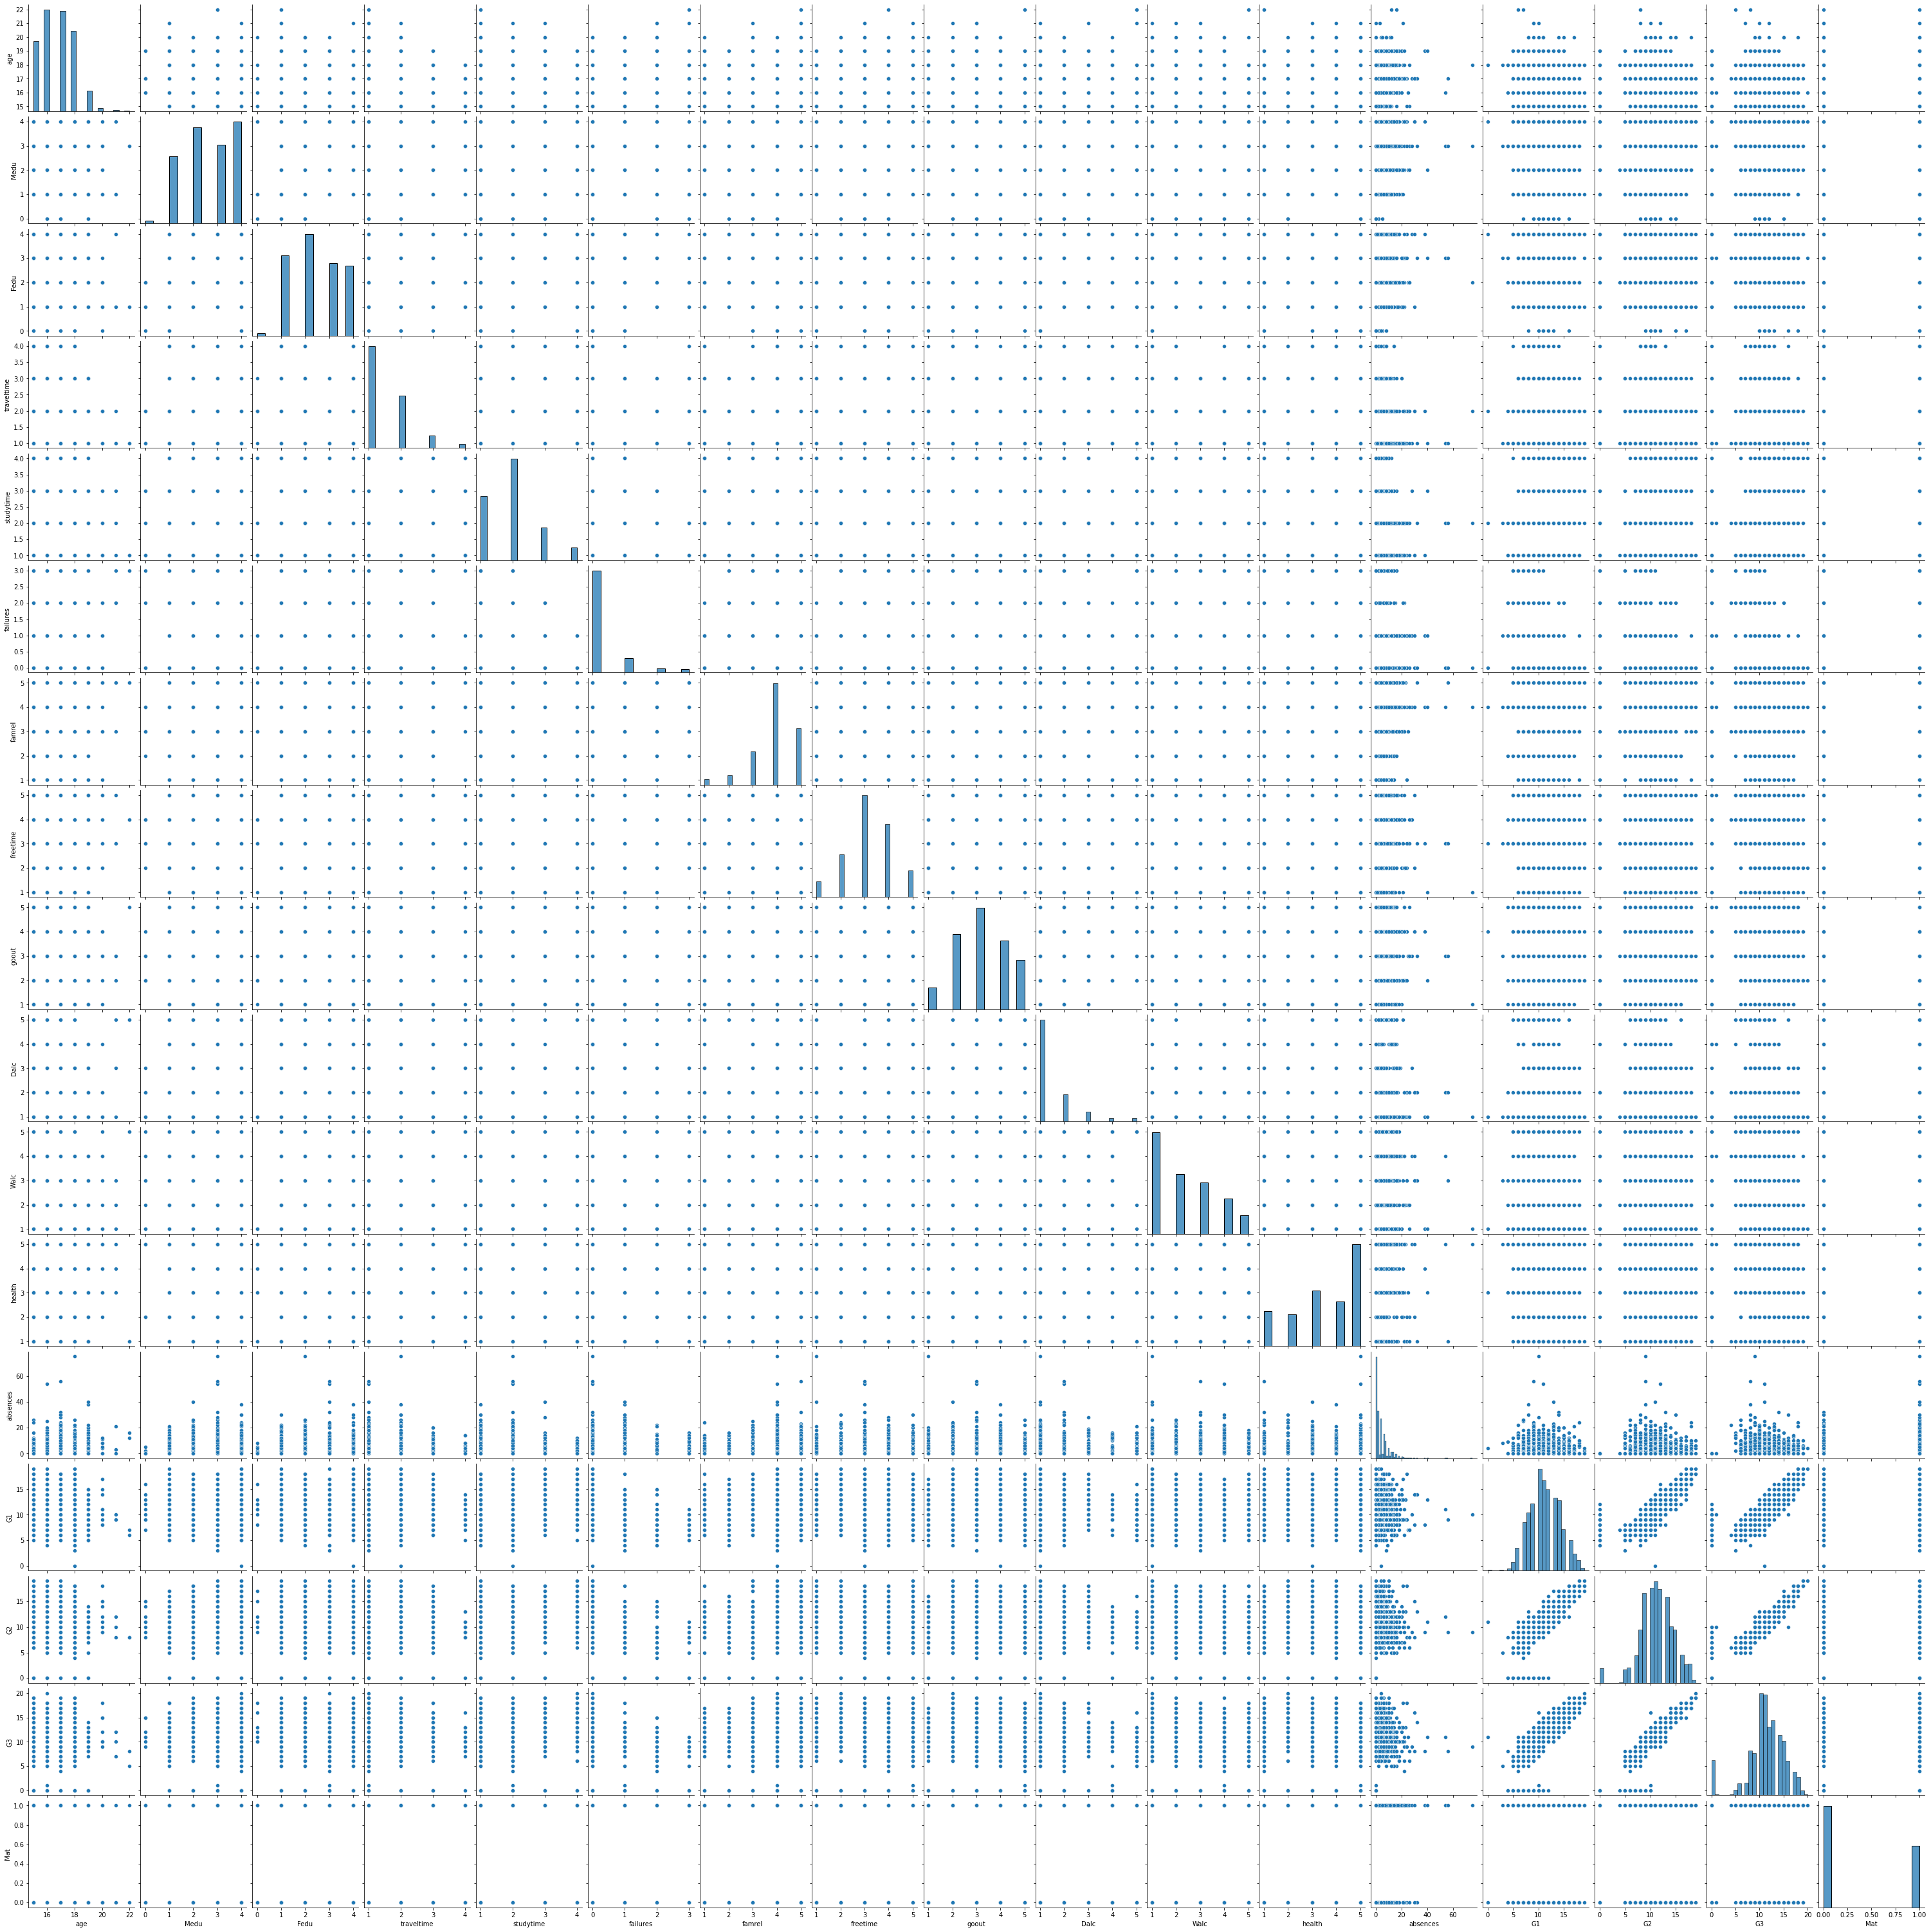

In [17]:
sns.pairplot(df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Mat']])

## Inferences

##### G1, G2 are in positive correlation with G#

<AxesSubplot:xlabel='G3', ylabel='Count'>

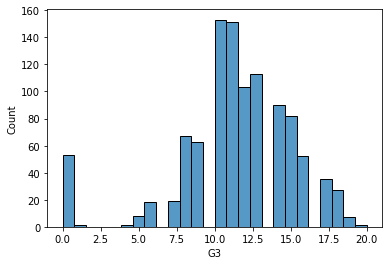

In [23]:
sns.histplot(df.G3)

<AxesSubplot:xlabel='G2', ylabel='Count'>

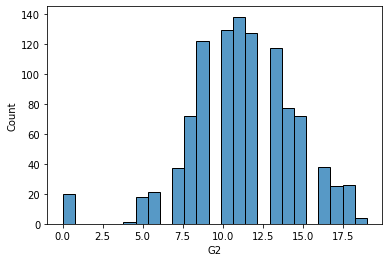

In [24]:
sns.histplot(df.G2)

<AxesSubplot:xlabel='G2', ylabel='Count'>

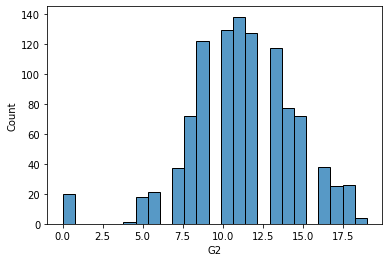

In [25]:
sns.histplot(df.G2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='G1', ylabel='G2'>

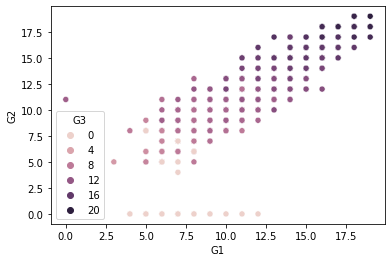

In [26]:
sns.scatterplot(df.G1,df.G2, hue=df.G3)

## Train Data 

In [27]:
#Check for the null values in the Train data
df.isnull().sum()
#The result signifies taht there are no null values present in the dataset

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Mat           0
dtype: int64

In [28]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [29]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mat
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.018790
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472,0.101246
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796,0.094795
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,-0.079881
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,0.060934
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,0.083043
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461,0.007091
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890,0.025949
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877,-0.032011
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642,-0.011335


Column G1 and G2 have a strong positive coorelation with column G3 in

We will now consider G3 as our target variable  which is a continouts variable which makes it a Regression 
problem statements

## Data Preprocessing

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [31]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Mat'], object: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']}

Below are the Categorical columns which needs to be converted into numerical columns in order to 
use them as a part of the analysis <br/>
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [32]:
le = LabelEncoder()

In [33]:
df_dummy = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
            'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']

In [34]:
for i in df_dummy:
    df[i] = le.fit_transform(df[i]) 
    

In [35]:
df.Mat.unique()

array([1, 0], dtype=int64)

## Standard Scaling the Data 

In [36]:
X = df.drop(columns=["G3"],axis=1)
y = df.G3

In [37]:
scaled_data = StandardScaler().fit_transform(X)

In [38]:
scaled_data

array([[-0.59357527, -0.87549841,  1.02788947, ..., -2.08372735,
        -1.59773801,  1.28181043],
       [-0.59357527, -0.87549841,  0.22103488, ..., -2.08372735,
        -1.90229132,  1.28181043],
       [-0.59357527, -0.87549841, -1.3926743 , ..., -1.41302861,
        -0.98863139,  1.28181043],
       ...,
       [ 1.68470629, -0.87549841,  1.02788947, ..., -0.07163114,
         0.22958185, -0.78014656],
       [ 1.68470629,  1.14220653,  0.22103488, ..., -0.40698051,
        -0.37952477, -0.78014656],
       [ 1.68470629,  1.14220653,  1.02788947, ..., -0.40698051,
        -0.07497146, -0.78014656]])

In [39]:
scaled_data = pd.DataFrame(data = scaled_data, columns = X.columns)

In [40]:
scaled_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mat
0,-0.593575,-0.875498,1.027889,0.612776,-0.643921,-2.761901,1.242077,1.466302,-1.629761,2.031994,...,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,0.252155,-2.083727,-1.597738,1.28181
1,-0.593575,-0.875498,0.221035,0.612776,-0.643921,0.362069,-1.426089,-1.262431,-1.629761,-0.285212,...,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.070060,-2.083727,-1.902291,1.28181
2,-0.593575,-0.875498,-1.392674,0.612776,1.552986,0.362069,-1.426089,-1.262431,-1.629761,-0.285212,...,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.896584,-1.413029,-0.988631,1.28181
3,-0.593575,-0.875498,-1.392674,0.612776,-0.643921,0.362069,1.242077,-0.352853,-0.826043,0.873391,...,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.392275,1.269766,0.838688,1.28181
4,-0.593575,-0.875498,-0.585820,0.612776,-0.643921,0.362069,0.352689,0.556724,-0.022325,-0.285212,...,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-1.748378,-0.379525,1.28181


In [41]:
scaled_data.shape

(1044, 33)

## Split the Datasets in Train and Test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.432, random_state=402)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((592, 33), (452, 33), (592,), (452,))

## Apply Linear Regression Model

In [44]:
linreg = LinearRegression()

In [45]:
linreg.fit(X_train,y_train)

LinearRegression()

In [46]:
linreg.coef_

array([-0.03112443,  0.10750938, -0.10984285,  0.01746074,  0.01721404,
       -0.12035366, -0.04557719, -0.02199666, -0.03306813, -0.10646564,
       -0.02078721, -0.01774403, -0.03192354, -0.04423883, -0.00876302,
        0.00386094,  0.06346855, -0.02391161, -0.17541436, -0.00506287,
        0.04113665,  0.03445664,  0.05076858,  0.07601107,  0.11610514,
       -0.10970123, -0.25376868,  0.24555598, -0.03266915,  0.24935422,
        0.41898645,  3.11507295, -0.37189707])

In [47]:
y_train.shape

(592,)

In [48]:
y_train_pred = linreg.predict(X_train)

In [49]:
y_train_pred = y_train_pred.reshape(-1,1)

In [50]:
y_train_pred.shape

(592, 1)

## Performance of Training Data 

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))

In [53]:
train_rmse

1.4948541931977528

## Performance on Test Data 

In [54]:
y_test_pred = linreg.predict(X_test)

In [55]:
test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

In [56]:
test_rmse

1.6366163562075229